# Step 0: Import Required Libraries

In this step, all the necessary libraries are imported. These libraries are used for data handling, preprocessing, model development, training, and evaluation throughout the project.

In [20]:
# Libraries for data handling and numerical operations
import pandas as pd
import numpy as np

# Library for data visualization
import matplotlib.pyplot as plt

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Step 1: Create a synthetic dataset with noise


In [21]:
# =========================
# Step 1: Create a Large Synthetic (Noisy) Dataset
# =========================

# This dataset simulates real-world student performance data.
# It intentionally contains:
# - Missing values
# - Outliers
# - Invalid values
# - Inconsistent ranges
# to demonstrate data cleaning and preprocessing techniques.

data = {
    'hours_study': [
        0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5,
        5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,
        np.nan, 1, 2, 3, 4, 6, 8, 10, 12, 15,
        18, 20, 22, 25, 30, 0, 0.2, 14, 16, 19,
        21, 24, 27, 35, 40, np.nan, 11, 13, 17, 28
    ],  # 30, 35, 40 = extreme outliers

    'attendance': [
        30, 35, 40, 45, 50, 52, 55, 58, 60, 62,
        65, 67, 70, 72, 75, 77, 80, 82, 85, 87,
        None, 90, 95, 100, 105, 110, 120, 130, 150, 200,
        55, 60, 65, 70, 75, 10, 20, 85, 88, 92,
        300, 250, 180, 160, 140, None, 98, 102, 108, 115
    ],  # >100 = unrealistic values

    'prev_score': [
        10, 15, 20, 25, 30, 35, 38, 40, 42, 45,
        48, 50, 52, 55, 58, 60, 62, 65, 68, 70,
        -10, 72, 75, 78, 80, 82, 85, 88, 90, 92,
        95, 98, 100, 105, 110, 0, 5, 83, 86, 89,
        -5, 115, 120, 130, 140, None, 76, 79, 84, 91
    ],  # negative & >100 = invalid

    'pass': [
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,
        0, 0, 1, 1, 1,
        1, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        0, 0, 1, 1, 1,
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1
    ]  # Target: 0 = Fail, 1 = Pass
}

# Create DataFrame
df = pd.DataFrame(data)

# Preview the dataset
df.head()


,hours_study,attendance,prev_score,pass
0,0.5,30.0,10.0,0
1,1.0,35.0,15.0,0
2,1.5,40.0,20.0,0
3,2.0,45.0,25.0,0
4,2.5,50.0,30.0,0


# Step 2: Data Understanding (EDA – Part 1)

In this step, an initial exploratory data analysis (EDA) is performed to understand the structure, size, and basic characteristics of the dataset. This includes inspecting the dataset shape, data types, summary statistics, and identifying potential data quality issues such as missing values and outliers.

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hours_study  48 non-null     float64
 1   attendance   48 non-null     float64
 2   prev_score   49 non-null     float64
 3   pass         50 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


In [23]:
df.describe()


,hours_study,attendance,prev_score,pass
count,48.000000,48.000000,49.000000,50.000000
mean,11.379167,92.083333,65.734694,0.580000
std,9.872850,54.656308,35.591885,0.498569
min,0.000000,10.000000,-10.000000,0.000000
25%,3.875000,60.000000,42.000000,0.000000
50%,8.250000,81.000000,72.000000,1.000000
75%,17.250000,105.750000,89.000000,1.000000
max,40.000000,300.000000,140.000000,1.000000


In [24]:
df.isnull().sum()


hours_study    2
attendance     2
prev_score     1
pass           0
dtype: int64

In [25]:
# Fill missing values in 'hours_study' with the mean
df['hours_study'] = df['hours_study'].fillna(df['hours_study'].mean())

# Fill missing values in 'attendance' with the median
df['attendance'] = df['attendance'].fillna(df['attendance'].median())



In [26]:
# Compute the median score for valid previous scores
median_score = int(df['prev_score'].median())

# Replace invalid previous scores (negative values) with the median
df.loc[df['prev_score'] < 0, 'prev_score'] = median_score

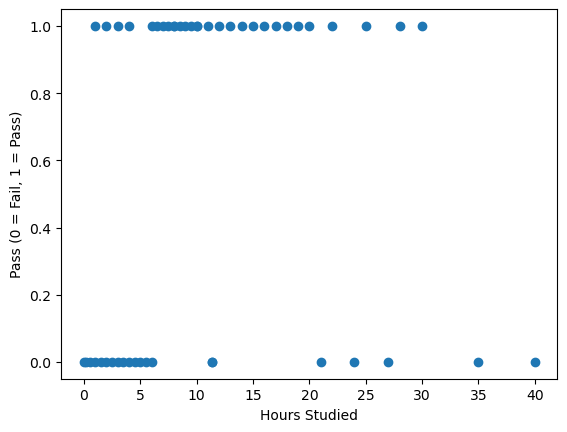

In [27]:

# Scatter plot to visualize the relationship between study hours and pass/fail outcome
plt.scatter(df['hours_study'], df['pass'])

# Axis labels for clarity
plt.xlabel("Hours Studied")
plt.ylabel("Pass (0 = Fail, 1 = Pass)")

# Display the plot
plt.show()

# STEP 5: Feature Engineering


In [28]:
# Create a new feature by combining study hours and attendance
# This represents overall study effort
df['study_effort'] = df['hours_study'] * df['attendance']

# Preview the updated dataset
df

,hours_study,attendance,prev_score,pass,study_effort
0,0.500000,30.0,10.0,0,15.0000
1,1.000000,35.0,15.0,0,35.0000
2,1.500000,40.0,20.0,0,60.0000
3,2.000000,45.0,25.0,0,90.0000
4,2.500000,50.0,30.0,0,125.0000
5,3.000000,52.0,35.0,0,156.0000
6,3.500000,55.0,38.0,0,192.5000
7,4.000000,58.0,40.0,0,232.0000
8,4.500000,60.0,42.0,0,270.0000
9,5.000000,62.0,45.0,0,310.0000


# STEP 6: Feature Selection

In [29]:

# Select input features for the model
X = df[['hours_study', 'attendance', 'prev_score', 'study_effort']]

# Define the target variable
y = df['pass']

# STEP 7: Train–Test Split

In [30]:
# Split the dataset into training and testing sets
# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

# STEP 8: Model Banana (Logistic Regression)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scaling features to standardize the range (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data using same scaler

# Create and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Optional: Check training accuracy
train_accuracy = model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")



Training Accuracy: 0.95


# STEP 9: Prediction

In [34]:
# Fill missing values in X_test using training set mean
X_test_filled = X_test.fillna(X_train.mean())

# Scaling
X_test_scaled = scaler.transform(X_test_filled)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Display predictions
print("Predictions on Test Data:")
print(y_pred)


Predictions on Test Data:
[0 1 1 1 1 1 1 1 1 1 0 0 1]


# STEP 10: Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Accuracy
# Accuracy = (Number of correct predictions) / (Total predictions)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# 2. Confusion Matrix
# Confusion matrix se har class ke True Positive, True Negative,
# False Positive aur False Negative ka pata chalta hai
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 3. Classification Report
# Precision, Recall, F1-score aur Support for each class
# Precision = TP / (TP + FP) → Correctly predicted / Total predicted
# Recall = TP / (TP + FN) → Correctly predicted / Total actual
# F1-score = Harmonic mean of precision & recall
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Test Accuracy: 0.7692307692307693
Confusion Matrix:
 [[1 1]
 [2 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.90      0.82      0.86        11

    accuracy                           0.77        13
   macro avg       0.62      0.66      0.63        13
weighted avg       0.81      0.77      0.79        13



# Step 11: Model Accuracy

In [36]:
# Accuracy in percentage
accuracy_percent = accuracy * 100
print("Model Accuracy: {:.2f}%".format(accuracy_percent))


Model Accuracy: 76.92%


# STEP 12: Predict for a new student

In [37]:
# 1. Create new student data
# This should have the same features as the training data
new_student = pd.DataFrame({
    'hours_study': [4],
    'attendance': [72],
    'prev_score': [55]
})

# 2. Feature Engineering
# Add the same 'study_effort' feature used in training
new_student['study_effort'] = new_student['hours_study'] * new_student['attendance']

# 3. Scaling
# Use the same scaler fitted on the training data
new_student_scaled = scaler.transform(new_student)

# 4. Prediction
# Model predicts 0 = Fail, 1 = Pass
new_prediction = model.predict(new_student_scaled)

# 5. Display result
print("Prediction for new student (0=Fail, 1=Pass):", new_prediction)


Prediction for new student (0=Fail, 1=Pass): [1]
